In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import xgboost

In [6]:
import catboost

In [76]:
import process_functions as func

ModuleNotFoundError: No module named 'process_functions'

In [49]:
def process(df):
    """processing and transforming of data.function retuns prepared dataset for training or evaluation"""
    df_inc = pre_process(df)
    df_cat = cat_values_process(df_inc)
    df_num = num_values_process(df_inc)    
    df_int = post_process(df_cat, df_num)
    
    if 'price_doc' in df.columns:
        y = df_int['price_doc']
    else:
        y = null
        
    X = df_int.drop('price_doc', axis = 1)
    return df

In [8]:
def cat_values_process(df):
    """fill na"""
    return df

In [9]:
def num_values_process(df):
    """data transforming"""
    return df

In [10]:
def pre_process(df):
    """OHE"""
    return df

In [11]:
def post_process(df_cat, df_num):
    """merge"""
    df_int = df_cat.merge(df_num)
    return df_int

In [12]:
df_macro = pd.read_pickle('macroeconomic.pkl')

In [13]:
df = pd.read_csv('project_data/attempt_4/train.csv')

In [14]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [15]:
df.shape

(30471, 292)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [69]:
empty_fields = df.isna().sum()
empty_fields

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [72]:
empty_fields = pd.DataFrame(empty_fields, columns=['number'])
empty_fields.head()

,number
id,0
timestamp,0
full_sq,0
life_sq,6383
floor,167


In [75]:
empty_fields = empty_fields[empty_fields['number']>0]
empty_fields.shape

(51, 1)

In [18]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [25]:
dataset_columns = df.columns

разобъем датасет на категориальные и цифровые признаки

In [30]:
cat_features = df.select_dtypes(include=['object']).columns

In [31]:
cat_features

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [35]:
df_cat = df[['id', *cat_features.to_list()]]

In [36]:
df_cat.head()

,id,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,1,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,3,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,4,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,5,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent


In [29]:
num_features =  df.select_dtypes(exclude=['object']).columns

In [32]:
num_features

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)

In [37]:
df_num = df[[*num_features.to_list()]]

In [39]:
df_num.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Анализ признаков по отдельности для каждого из типов признаков.

#### Анализ числовых признаков

Параллельно с анализом признаков имеет смысл определять выбросы.  
Если соличество значений, которые являются выбросами сравнительно невелико (меньше одного процента от датасета, то имеет смысл удалять такие значения).

In [42]:
num_features.shape

(276,)

In [45]:
num_features[1:13]


Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'green_zone_part'],
      dtype='object')

<AxesSubplot:xlabel='green_zone_part'>

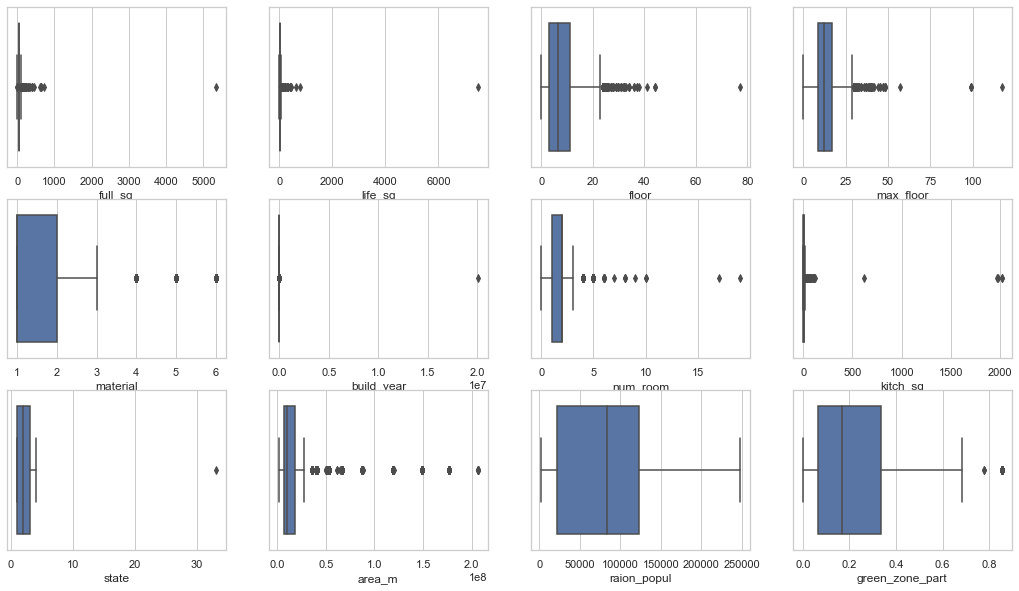

In [46]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='full_sq')   
sns.boxplot(ax=axes[0, 1], data=df, x='life_sq')
sns.boxplot(ax=axes[0, 2], data=df, x='floor')
sns.boxplot(ax=axes[0, 3], data=df, x='max_floor')
sns.boxplot(ax=axes[1, 0], data=df, x='material')
sns.boxplot(ax=axes[1, 1], data=df, x='build_year')
sns.boxplot(ax=axes[1, 2], data=df, x='num_room')
sns.boxplot(ax=axes[1, 3], data=df, x='kitch_sq')
sns.boxplot(ax=axes[2, 0], data=df, x='state')
sns.boxplot(ax=axes[2, 1], data=df, x='area_m')
sns.boxplot(ax=axes[2, 2], data=df, x='raion_popul')
sns.boxplot(ax=axes[2, 3], data=df, x='green_zone_part')

In [58]:
df[df['full_sq'] > 1000]['full_sq'].count()

1

In [60]:
df[df['life_sq'] > 1000]['life_sq'].count()

1

In [61]:
df[df['floor'] > 50]['floor'].count()

1

In [62]:
df[df['max_floor'] > 50]['max_floor'].count()

5

In [79]:
df['build_year'].describe()

count    1.686600e+04
mean     3.068057e+03
std      1.543878e+05
min      0.000000e+00
25%      1.967000e+03
50%      1.979000e+03
75%      2.005000e+03
max      2.005201e+07
Name: build_year, dtype: float64

In [77]:
df[df['build_year'] > 50]['build_year'].count()

15965

In [81]:
df[df['num_room'] > 12]['num_room'].count()

2

In [82]:
df[df['kitch_sq'] > 100]['kitch_sq'].count()

9

In [ ]:
df[df['floor'] > 50]['floor'].count()

In [ ]:
df[df['floor'] > 50]['floor'].count()

In [ ]:
df[df['floor'] > 50]['floor'].count()

Применение выбраных методов обработки к датасету.

In [47]:
df.shape

(30471, 292)

In [50]:
df_processed = process(df)

In [51]:
df_processed.shape

(30471, 292)

In [22]:
df_date = pd.read_pickle('macroeconomic.pkl')

In [23]:
df_complete = df.merge(df_date, how='left', left_on='timestamp', right_on='timestamp')

In [24]:
df_complete.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,students_state_oneshift,provision_nurse,load_on_doctors,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,seats_theather_rfmin_per_100000_cap,population_reg_sports_share,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,29.07,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,30.63,793.319561,89.0495,99.6,8180.755454,846.0,302.0,0.45356,22.37,230310.0


In [26]:
df_complete.shape

(30471, 340)

In [ ]:
X_train, y_train, X_valid, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 33)